<a href="https://colab.research.google.com/github/mgomez270/Series-Temporales/blob/main/Ocupacion_Hospitalaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#titulo

In [ ]:
from datetime import datetime, timedelta
import requests
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import seaborn as sns

In [ ]:
 df = pd.read_csv('ocupacion fsfb (1).csv', sep=';')
df.head()

,Grupo ocupación,Fecha corte,DISPONIBLE,OCUPADA
0,OCUPACIÓN HOSPITALIZACIÓN,16/06/2020 3:02:03 a.m.,87,162
1,OCUPACIÓN HOSPITALIZACIÓN,16/06/2020 6:01:26 a.m.,83,166
2,OCUPACIÓN HOSPITALIZACIÓN,17/06/2020 3:02:40 a.m.,72,176
3,OCUPACIÓN HOSPITALIZACIÓN,17/06/2020 6:00:11 a.m.,66,182
4,OCUPACIÓN HOSPITALIZACIÓN,18/06/2020 3:02:08 a.m.,73,176


In [ ]:
# prompt: al dataframe df agregale una columna que se llame CAMAS TOTALES que sea la suma entre las columnas DISPONIBLE y OCUPADA, al nuevo dataframe llamalo DF_2

# Assuming df is already defined as in the previous code

df['CAMAS TOTALES'] = df['DISPONIBLE'] + df['OCUPADA']
DF_1 = df
DF_1.head()

,Grupo ocupación,Fecha corte,DISPONIBLE,OCUPADA,CAMAS TOTALES
0,OCUPACIÓN HOSPITALIZACIÓN,16/06/2020 3:02:03 a.m.,87,162,249
1,OCUPACIÓN HOSPITALIZACIÓN,16/06/2020 6:01:26 a.m.,83,166,249
2,OCUPACIÓN HOSPITALIZACIÓN,17/06/2020 3:02:40 a.m.,72,176,248
3,OCUPACIÓN HOSPITALIZACIÓN,17/06/2020 6:00:11 a.m.,66,182,248
4,OCUPACIÓN HOSPITALIZACIÓN,18/06/2020 3:02:08 a.m.,73,176,249


In [ ]:
# prompt: al dataframe DF_2 agregale una columna que se llame % OCUPACION que sea la DIVISION ENTRE las columnas OCUPADA y CAMAS TOTALES multiplicado por 100 y llama al nuevo dataframe DF_3

# Assuming df is already defined as in the previous code and contains columns 'OCUPADA' and 'CAMAS TOTALES'
# and DF_1 is already defined as well.

DF_2 = DF_1.copy() # Create a copy to avoid modifying the original DataFrame

DF_2['% OCUPACION'] = (DF_2['OCUPADA'] / DF_2['CAMAS TOTALES']) * 100

DF_3 = DF_2 # Assign the modified DataFrame to DF_3
DF_3.head()

,Grupo ocupación,Fecha corte,DISPONIBLE,OCUPADA,CAMAS TOTALES,% OCUPACION
0,OCUPACIÓN HOSPITALIZACIÓN,16/06/2020 3:02:03 a.m.,87,162,249,65.060241
1,OCUPACIÓN HOSPITALIZACIÓN,16/06/2020 6:01:26 a.m.,83,166,249,66.666667
2,OCUPACIÓN HOSPITALIZACIÓN,17/06/2020 3:02:40 a.m.,72,176,248,70.967742
3,OCUPACIÓN HOSPITALIZACIÓN,17/06/2020 6:00:11 a.m.,66,182,248,73.387097
4,OCUPACIÓN HOSPITALIZACIÓN,18/06/2020 3:02:08 a.m.,73,176,249,70.682731


In [ ]:
# prompt: al dataframe DF_3 ELIMINA LO QUE ESTA DESPUES DEL PRIMER ESPACIO EN LA COLUMNA Fecha corte Y LLAMA AL NUEVO dataframe DF_4

# Assuming DF_3 is already defined as in the previous code.

DF_4 = DF_3.copy()
DF_4['Fecha corte'] = DF_4['Fecha corte'].str.split().str[0]
DF_4.head()

,Grupo ocupación,Fecha corte,DISPONIBLE,OCUPADA,CAMAS TOTALES,% OCUPACION
0,OCUPACIÓN HOSPITALIZACIÓN,16/06/2020,87,162,249,65.060241
1,OCUPACIÓN HOSPITALIZACIÓN,16/06/2020,83,166,249,66.666667
2,OCUPACIÓN HOSPITALIZACIÓN,17/06/2020,72,176,248,70.967742
3,OCUPACIÓN HOSPITALIZACIÓN,17/06/2020,66,182,248,73.387097
4,OCUPACIÓN HOSPITALIZACIÓN,18/06/2020,73,176,249,70.682731


In [ ]:
# prompt: PARA EL DATAFRAME DF_4 elimina los registros que tienen como fecha en la columna Fecha corte, fechas iguales o posteriores a: 5/11/2024 y llama al nuevo dataframe DF_5

# Assuming DF_4 is already defined as in the previous code.

from datetime import datetime

# Convert 'Fecha corte' to datetime objects
DF_4['Fecha corte'] = pd.to_datetime(DF_4['Fecha corte'], format='%d/%m/%Y', errors='coerce')

# Filter out rows with dates on or after 5/11/2024
DF_5 = DF_4[DF_4['Fecha corte'] < datetime(2024, 11, 5)]

In [ ]:
DF_5.shape

(4656, 6)

In [ ]:
# prompt: PARA EL DATAFRAME DF_5 elimina las filas que tengan OCUPACIÓN UCI en la columna Grupo ocupación y llama al nuevo dataframe DF_6

# Assuming DF_5 is already defined as in the previous code.

DF_6 = DF_5[DF_5['Grupo ocupación'] != 'OCUPACIÓN UCI']

In [ ]:
DF_6.shape

(2328, 6)

In [ ]:
# prompt: para DF_6 cuenta los registros que tengan valores duplicados en la columna Fecha corte

# Assuming DF_6 is already defined as in the previous code.

duplicate_dates_count = DF_6[DF_6.duplicated(subset=['Fecha corte'], keep=False)].shape[0]
print(f"Number of records with duplicate 'Fecha corte': {duplicate_dates_count}")

Number of records with duplicate 'Fecha corte': 1808


In [ ]:
# prompt: para DF_6 elimina los registros que tengan valores duplicados en la columna Fecha corte con el siguiente criterio: tengan el menor valor en la columna % OCUPACIONy llama al nuevo dataframe DF_7

# Assuming DF_6 is already defined as in the previous code.

DF_7 = DF_6.sort_values('% OCUPACION').drop_duplicates(subset=['Fecha corte'], keep='first')

In [ ]:
# prompt: para DF_7 elimina los registros que tengan outliers en las columnas DISPONIBLE	OCUPADA	CAMAS TOTALES	% OCUPACION y cuenta cuantos valores eliminaste, llama al nuevo dataframe DF_8

import pandas as pd

# Assuming DF_7 is already defined as in the previous code.

def remove_outliers(df, columns):
    df_no_outliers = df.copy()
    removed_count = 0

    for col in columns:
        Q1 = df_no_outliers[col].quantile(0.25)
        Q3 = df_no_outliers[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_indices = df_no_outliers[(df_no_outliers[col] < lower_bound) | (df_no_outliers[col] > upper_bound)].index
        removed_count += len(outliers_indices)
        df_no_outliers.drop(outliers_indices, inplace=True)

    return df_no_outliers, removed_count

columns_to_check = ['DISPONIBLE', 'OCUPADA', 'CAMAS TOTALES', '% OCUPACION']
DF_8, outliers_removed = remove_outliers(DF_7, columns_to_check)

print(f"Number of outliers removed: {outliers_removed}")

Number of outliers removed: 123


In [ ]:
DF_8.shape

(1301, 6)

In [ ]:
# prompt: en la columna Fecha corte del dataframe DF_8 hay registros entre el 16/06/2020 y el 4/11/2024 identifica que fechas entre este periodo de tiempo tienen 0 registros y cuenta cuantas fechas tienen 0 registros

# Assuming DF_8 is already defined as in the previous code.

# Define the date range
start_date = datetime(2020, 6, 16)
end_date = datetime(2024, 11, 4)

# Create a date range
date_range = pd.date_range(start=start_date, end=end_date)

# Create a DataFrame from the date range
date_df = pd.DataFrame({'Fecha corte': date_range})

# Convert 'Fecha corte' column in DF_8 to datetime objects (if not already done)
DF_8['Fecha corte'] = pd.to_datetime(DF_8['Fecha corte'])

# Merge the date range DataFrame with DF_8
merged_df = pd.merge(date_df, DF_8, on='Fecha corte', how='left')

# Identify dates with 0 records
missing_dates = merged_df[merged_df['DISPONIBLE'].isnull()]

# Count the number of missing dates
missing_dates_count = len(missing_dates)

print(f"Fechas con 0 registros:\n{missing_dates['Fecha corte'].tolist()}")
print(f"\nNúmero de fechas con 0 registros: {missing_dates_count}")

Fechas con 0 registros:
[Timestamp('2020-06-16 00:00:00'), Timestamp('2020-06-17 00:00:00'), Timestamp('2020-06-18 00:00:00'), Timestamp('2020-06-19 00:00:00'), Timestamp('2020-06-20 00:00:00'), Timestamp('2020-06-21 00:00:00'), Timestamp('2020-06-22 00:00:00'), Timestamp('2020-06-24 00:00:00'), Timestamp('2020-06-26 00:00:00'), Timestamp('2020-06-27 00:00:00'), Timestamp('2020-06-28 00:00:00'), Timestamp('2020-06-29 00:00:00'), Timestamp('2020-06-30 00:00:00'), Timestamp('2020-07-02 00:00:00'), Timestamp('2020-07-09 00:00:00'), Timestamp('2020-07-31 00:00:00'), Timestamp('2020-08-01 00:00:00'), Timestamp('2020-08-02 00:00:00'), Timestamp('2020-08-06 00:00:00'), Timestamp('2020-08-07 00:00:00'), Timestamp('2020-08-08 00:00:00'), Timestamp('2020-08-16 00:00:00'), Timestamp('2020-08-22 00:00:00'), Timestamp('2020-08-23 00:00:00'), Timestamp('2020-08-24 00:00:00'), Timestamp('2020-08-25 00:00:00'), Timestamp('2020-08-28 00:00:00'), Timestamp('2020-08-29 00:00:00'), Timestamp('2020-08-30 0

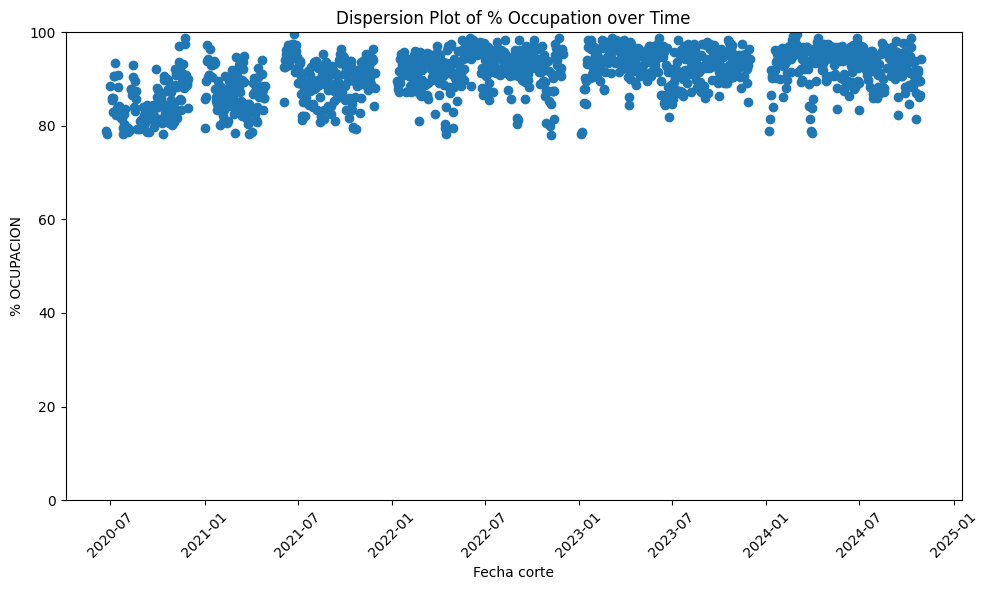

In [ ]:
# prompt: haz una grafica de dispersion para DF_8 en el eje x coloca Fecha corte y en el eje y coloca % OCUPACION, muestra el eje y entre 0 y 100

import matplotlib.pyplot as plt

# Assuming DF_8 is already defined as in the previous code.

plt.figure(figsize=(10, 6))
plt.scatter(DF_8['Fecha corte'], DF_8['% OCUPACION'])
plt.xlabel('Fecha corte')
plt.ylabel('% OCUPACION')
plt.ylim(0, 100)  # Set y-axis limit
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.title('Dispersion Plot of % Occupation over Time')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
DF_8.shape
DF_8.describe()

,Fecha corte,DISPONIBLE,OCUPADA,CAMAS TOTALES,% OCUPACION
count,1301,1301.000000,1301.000000,1301.000000,1301.000000
mean,2022-10-01 12:08:18.078401280,21.382014,223.707917,245.089931,91.254407
min,2020-06-23 00:00:00,1.000000,183.000000,227.000000,78.099174
25%,2021-09-08 00:00:00,12.000000,215.000000,241.000000,88.306452
50%,2022-10-04 00:00:00,19.000000,226.000000,245.000000,92.213115
75%,2023-10-19 00:00:00,28.000000,235.000000,249.000000,95.061728
max,2024-10-29 00:00:00,55.000000,254.000000,262.000000,99.593496
std,NaN,11.670645,14.249238,7.140054,4.808030


In [ ]:
# prompt: para DF_8 crea filas con las fechas que tienen 0 registros y asigna  valores para las columna DISPONIBLE entre mas o menos 50% respecto al promedio, la columna OCUPADA debe diligenciarse como 245-disponible, la columna CAMAS TOTALES asignar el valor de 245.089;  y la columna % OCUPACION calcularla como la división entre OCUPADA y CAMAS TOTALES multiplicado por 100. LLAMA AL NUEVO DATAFRAME DF_9

# Assuming DF_8 is already defined as in the previous code.

# Calculate the average 'DISPONIBLE'
avg_disponible = DF_8['DISPONIBLE'].mean()

# Create a list to store the new rows
new_rows = []

# Iterate through the missing dates
for index, row in missing_dates.iterrows():
  # Generate a random 'DISPONIBLE' value within +/- 50% of the average
  random_disponible = avg_disponible + (np.random.rand() - 0.5) * avg_disponible
  # Ensure DISPONIBLE is not negative
  random_disponible = max(0, random_disponible)

  # Calculate 'OCUPADA' and '% OCUPACION'
  ocupada = 245 - random_disponible
  porcentaje_ocupacion = (ocupada / 245.089) * 100

  # Create a new row dictionary
  new_row = {
      'Fecha corte': row['Fecha corte'],
      'DISPONIBLE': random_disponible,
      'OCUPADA': ocupada,
      'CAMAS TOTALES': 245.089,
      '% OCUPACION': porcentaje_ocupacion
  }
  new_rows.append(new_row)

# Create a DataFrame from the new rows
new_df = pd.DataFrame(new_rows)

# Concatenate the new rows with DF_8 to create DF_9
DF_9 = pd.concat([DF_8, new_df], ignore_index=True)

In [ ]:
DF_9.shape

(1603, 6)

In [ ]:
DF_9.head()

,Grupo ocupación,Fecha corte,DISPONIBLE,OCUPADA,CAMAS TOTALES,% OCUPACION
0,OCUPACIÓN HOSPITALIZACIÓN,2022-11-07,53.0,189.0,242.0,78.099174
1,OCUPACIÓN HOSPITALIZACIÓN,2021-03-28,55.0,197.0,252.0,78.174603
2,OCUPACIÓN HOSPITALIZACIÓN,2023-01-05,53.0,190.0,243.0,78.189300
3,OCUPACIÓN HOSPITALIZACIÓN,2022-04-16,52.0,187.0,239.0,78.242678
4,OCUPACIÓN HOSPITALIZACIÓN,2020-10-11,53.0,191.0,244.0,78.278689


In [ ]:

DF_9.describe()

,Fecha corte,DISPONIBLE,OCUPADA,CAMAS TOTALES,% OCUPACION
count,1603,1603.000000,1603.000000,1603.000000,1603.000000
mean,2022-08-25 23:59:59.999999744,21.294271,223.778717,245.089755,91.287400
min,2020-06-16 00:00:00,1.000000,183.000000,227.000000,78.099174
25%,2021-07-21 12:00:00,13.000000,216.060315,243.000000,88.749255
50%,2022-08-26 00:00:00,20.000000,225.000000,245.089000,91.923077
75%,2023-09-30 12:00:00,27.559130,233.000000,248.000000,94.735298
max,2024-11-04 00:00:00,55.000000,254.000000,262.000000,99.593496
std,NaN,10.823498,13.090976,6.431939,4.456520


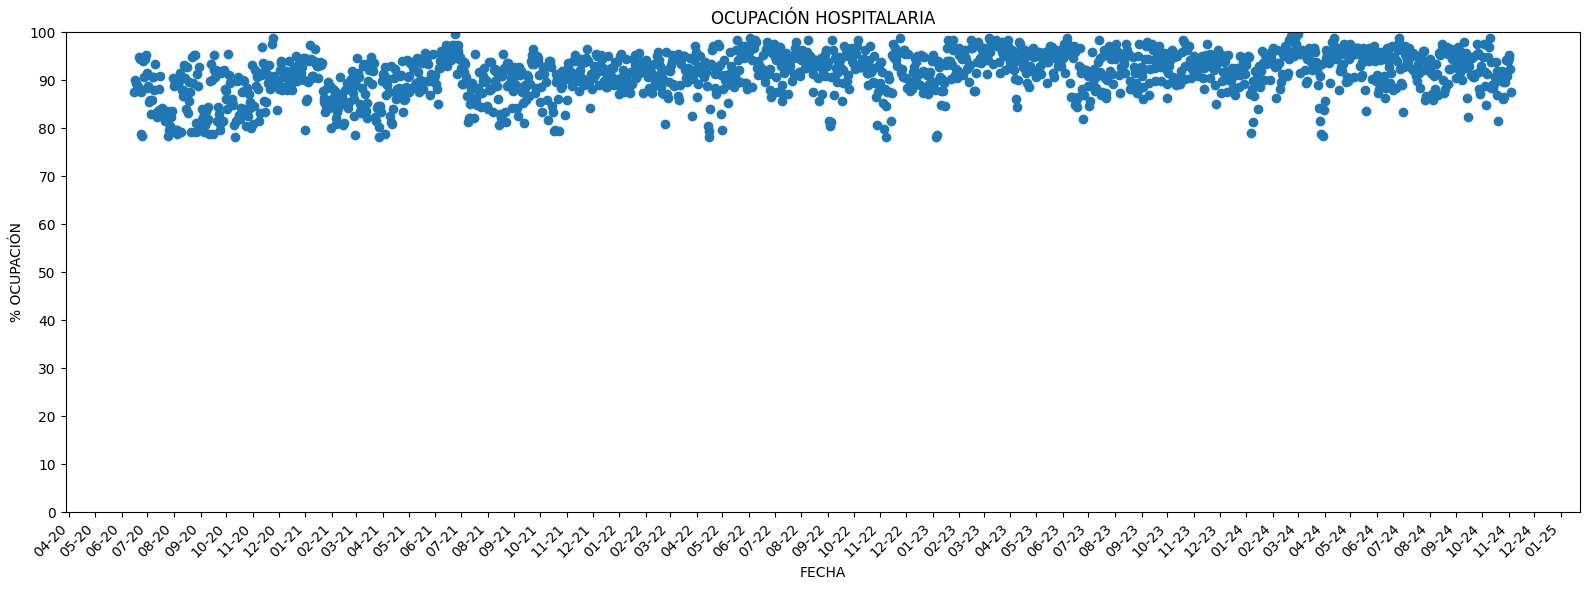

In [ ]:
# prompt: # prompt: haz una grafica de dispersion para DF_9 en el eje x coloca Fecha corte y en el eje y coloca % OCUPACION, muestra el eje y entre 0 y 100, CADA 10. TITULO DE LA GRAFICA: OCUPACIÓN HOSPITALARIA, TITULO EJE Y: % OCUPACIÓN; TITULO EJE X: FECHA. EL EJE X DEJA CADA MES. EL FORMATO DE LAS FECHAS EN EL EJE X SEA MES-AÑO Y EL AÑO SOLO LOS DOS ULTIMOS NUMEROS

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming DF_9 is already defined as in the previous code.

# Create the scatter plot
plt.figure(figsize=(16, 6))
plt.scatter(DF_9['Fecha corte'], DF_9['% OCUPACION'])

# Set plot title and axis labels
plt.title('OCUPACIÓN HOSPITALARIA')
plt.xlabel('FECHA')
plt.ylabel('% OCUPACIÓN')

# Set y-axis limits and ticks
plt.ylim(0, 100)
plt.yticks(range(0, 101, 10))

# Format x-axis dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
predicciones_fsfb = pd.read_csv('/content/predicciones ocupacion fsfb.csv',sep= ';')

In [ ]:
predicciones_fsfb = predicciones_fsfb[predicciones_fsfb['Grupo ocupación'] == 'OCUPACIÓN HOSPITALIZACIÓN']

In [ ]:
meses = {
    'enero': '01', 'febrero': '02', 'marzo': '03',
    'abril': '04', 'mayo': '05', 'junio': '06',
    'julio': '07', 'agosto': '08', 'septiembre': '09',
    'octubre': '10', 'noviembre': '11', 'diciembre': '12'
}

# Función para convertir texto de fecha
def convertir_fecha(texto):
    for mes, num in meses.items():
        if mes in texto:
            texto = texto.replace(f" de {mes} de ", f"-{num}-")
            break
    return datetime.strptime(texto, '%d-%m-%Y').date()

predicciones_fsfb['Día de Fecha corte'] = predicciones_fsfb['Día de Fecha corte'].apply(convertir_fecha)

In [ ]:
predicciones_fsfb

,Día de Fecha corte,Estado final cama,Grupo ocupación,Recuento definido de Cama
0,2024-01-01,OCUPADA,OCUPACIÓN HOSPITALIZACIÓN,227
1,2024-01-02,OCUPADA,OCUPACIÓN HOSPITALIZACIÓN,234
2,2024-01-03,OCUPADA,OCUPACIÓN HOSPITALIZACIÓN,236
3,2024-01-04,OCUPADA,OCUPACIÓN HOSPITALIZACIÓN,237
4,2024-01-05,OCUPADA,OCUPACIÓN HOSPITALIZACIÓN,229
...,...,...,...,...
145,2024-05-25,OCUPADA,OCUPACIÓN HOSPITALIZACIÓN,225
146,2024-05-26,OCUPADA,OCUPACIÓN HOSPITALIZACIÓN,220
147,2024-05-27,OCUPADA,OCUPACIÓN HOSPITALIZACIÓN,227
148,2024-05-28,OCUPADA,OCUPACIÓN HOSPITALIZACIÓN,234


In [ ]:
predicciones_fsfb['Día de Fecha corte'] = pd.to_datetime(
    predicciones_fsfb['Día de Fecha corte'],
    format='%d de %B de %Y',
    errors='coerce'
)

In [ ]:
# prompt: PARA EL DATAFRAME DF_9 CREA UNA NUEVA COLUMA QUE SE LLAME CAMAS OCUPADAS PRED.  BÁSICA Y ASIGNA LOS VALORES DE LA COLUMA Recuento definido de Cama DEL DATAFRAME predicciones_fsfb que coincida por fecha. EL NUEVO DATAFRAME SE LLAMA DF_10

# Create a copy of DF_9 to avoid modifying the original DataFrame
DF_10 = DF_9.copy()

# Convert 'Fecha corte' column in DF_10 to datetime objects if not already done
DF_10['Fecha corte'] = pd.to_datetime(DF_10['Fecha corte'])

# Convert 'Día de Fecha corte' column in predicciones_fsfb to datetime objects if not already done
predicciones_fsfb['Día de Fecha corte'] = pd.to_datetime(predicciones_fsfb['Día de Fecha corte'])

# Merge the two dataframes based on the date columns
DF_10 = pd.merge(DF_10, predicciones_fsfb[['Día de Fecha corte', 'Recuento definido de Cama']],
                 left_on='Fecha corte', right_on='Día de Fecha corte', how='left')

# Rename the 'Recuento definido de Cama' column to 'CAMAS OCUPADAS PRED. BÁSICA'
DF_10 = DF_10.rename(columns={'Recuento definido de Cama': 'CAMAS OCUPADAS PRED. BÁSICA'})

# Drop the 'Día de Fecha corte' column as it is no longer needed
DF_10 = DF_10.drop(columns=['Día de Fecha corte'])

In [ ]:
DF_10.describe()

,Fecha corte,DISPONIBLE,OCUPADA,CAMAS TOTALES,% OCUPACION,CAMAS OCUPADAS PRED. BÁSICA
count,1603,1603.000000,1603.000000,1603.000000,1603.000000,150.000000
mean,2022-08-25 23:59:59.999999744,21.294271,223.778717,245.089755,91.287400,229.766667
min,2020-06-16 00:00:00,1.000000,183.000000,227.000000,78.099174,220.000000
25%,2021-07-21 12:00:00,13.000000,216.060315,243.000000,88.749255,225.000000
50%,2022-08-26 00:00:00,20.000000,225.000000,245.089000,91.923077,229.000000
75%,2023-09-30 12:00:00,27.559130,233.000000,248.000000,94.735298,236.000000
max,2024-11-04 00:00:00,55.000000,254.000000,262.000000,99.593496,237.000000
std,NaN,10.823498,13.090976,6.431939,4.456520,5.797959


In [ ]:
# prompt: PARA DF_10 CREA UNA COLUMNA LLAMADA "% OCUPACION PRED. BÁSICA" CALCULADA COMO:  "CAMAS OCUPADAS PRED. BÁSICA" / "CAMAS TOTALES"*100. NUEVO DATAFRAME SE LLAMARA DF_11

# Assuming DF_10 is already defined as in the previous code.

# Create a copy of DF_10 to avoid modifying the original DataFrame
DF_11 = DF_10.copy()

# Calculate the "% OCUPACION PRED. BÁSICA" column
DF_11['% OCUPACION PRED. BÁSICA'] = (DF_11['CAMAS OCUPADAS PRED. BÁSICA'] / DF_11['CAMAS TOTALES']) * 100

In [ ]:
DF_11.head()

,Grupo ocupación,Fecha corte,DISPONIBLE,OCUPADA,CAMAS TOTALES,% OCUPACION,CAMAS OCUPADAS PRED. BÁSICA,% OCUPACION PRED. BÁSICA
0,OCUPACIÓN HOSPITALIZACIÓN,2022-11-07,53.0,189.0,242.0,78.099174,NaN,NaN
1,OCUPACIÓN HOSPITALIZACIÓN,2021-03-28,55.0,197.0,252.0,78.174603,NaN,NaN
2,OCUPACIÓN HOSPITALIZACIÓN,2023-01-05,53.0,190.0,243.0,78.189300,NaN,NaN
3,OCUPACIÓN HOSPITALIZACIÓN,2022-04-16,52.0,187.0,239.0,78.242678,NaN,NaN
4,OCUPACIÓN HOSPITALIZACIÓN,2020-10-11,53.0,191.0,244.0,78.278689,NaN,NaN


In [ ]:
DF_11.describe()

,Fecha corte,DISPONIBLE,OCUPADA,CAMAS TOTALES,% OCUPACION,CAMAS OCUPADAS PRED. BÁSICA,% OCUPACION PRED. BÁSICA
count,1603,1603.000000,1603.000000,1603.000000,1603.000000,150.000000,150.000000
mean,2022-08-25 23:59:59.999999744,21.294271,223.778717,245.089755,91.287400,229.766667,93.342918
min,2020-06-16 00:00:00,1.000000,183.000000,227.000000,78.099174,220.000000,88.000000
25%,2021-07-21 12:00:00,13.000000,216.060315,243.000000,88.749255,225.000000,91.532258
50%,2022-08-26 00:00:00,20.000000,225.000000,245.089000,91.923077,229.000000,93.600000
75%,2023-09-30 12:00:00,27.559130,233.000000,248.000000,94.735298,236.000000,95.161290
max,2024-11-04 00:00:00,55.000000,254.000000,262.000000,99.593496,237.000000,100.000000
std,NaN,10.823498,13.090976,6.431939,4.456520,5.797959,2.550516


In [ ]:
# prompt: A DF_11 ELIMINA LA COLUMNA Grupo ocupación Y LLAMA AL NUEVO DATAFRAME DF_10 muestrame las primeras 5 filas. nuevo dataframe DF_12

# Assuming DF_11 is already defined as in the previous code.

# Create a copy of DF_11 to avoid modifying the original DataFrame
DF_12 = DF_11.copy()

# Drop the 'Grupo ocupación' column
DF_12 = DF_12.drop(columns=['Grupo ocupación'])

# Display the first 5 rows of the new DataFrame DF_12
print(DF_12.head())

  Fecha corte  DISPONIBLE  OCUPADA  CAMAS TOTALES  % OCUPACION  \
0  2022-11-07        53.0    189.0          242.0    78.099174   
1  2021-03-28        55.0    197.0          252.0    78.174603   
2  2023-01-05        53.0    190.0          243.0    78.189300   
3  2022-04-16        52.0    187.0          239.0    78.242678   
4  2020-10-11        53.0    191.0          244.0    78.278689   

   CAMAS OCUPADAS PRED. BÁSICA  % OCUPACION PRED. BÁSICA  
0                          NaN                       NaN  
1                          NaN                       NaN  
2                          NaN                       NaN  
3                          NaN                       NaN  
4                          NaN                       NaN  


In [ ]:
DF_12.head()

,Fecha corte,DISPONIBLE,OCUPADA,CAMAS TOTALES,% OCUPACION,CAMAS OCUPADAS PRED. BÁSICA,% OCUPACION PRED. BÁSICA
0,2022-11-07,53.0,189.0,242.0,78.099174,NaN,NaN
1,2021-03-28,55.0,197.0,252.0,78.174603,NaN,NaN
2,2023-01-05,53.0,190.0,243.0,78.189300,NaN,NaN
3,2022-04-16,52.0,187.0,239.0,78.242678,NaN,NaN
4,2020-10-11,53.0,191.0,244.0,78.278689,NaN,NaN


In [ ]:
# prompt: al dataframe DF_12 ESCALA LAS COLUMNAS DISPONIBLE	OCUPADA	CAMAS TOTALES	% OCUPACION	CAMAS OCUPADAS PRED. BÁSICA	% OCUPACION PRED. BÁSICA CON MinMaxScaler LLAMA AL NUEVO DATAFRAME DF_13

# Assuming DF_12 is already defined as in the previous code.

# Create a copy of DF_12 to avoid modifying the original DataFrame
#DF_13 = DF_12.copy()

# Define the columns to scale
#columns_to_scale = ['DISPONIBLE', 'OCUPADA', 'CAMAS TOTALES', '% OCUPACION', 'CAMAS OCUPADAS PRED. BÁSICA', '% OCUPACION PRED. BÁSICA']

# Initialize the MinMaxScaler
#scaler = MinMaxScaler()

# Fit and transform the selected columns
#DF_13[columns_to_scale] = scaler.fit_transform(DF_13[columns_to_scale])

# Display the first few rows of the scaled DataFrame
#print(DF_13.head())

In [ ]:
DF_13=DF_12.copy()

In [ ]:
DF_13.head()

,Fecha corte,DISPONIBLE,OCUPADA,CAMAS TOTALES,% OCUPACION,CAMAS OCUPADAS PRED. BÁSICA,% OCUPACION PRED. BÁSICA
0,2022-11-07,53.0,189.0,242.0,78.099174,NaN,NaN
1,2021-03-28,55.0,197.0,252.0,78.174603,NaN,NaN
2,2023-01-05,53.0,190.0,243.0,78.189300,NaN,NaN
3,2022-04-16,52.0,187.0,239.0,78.242678,NaN,NaN
4,2020-10-11,53.0,191.0,244.0,78.278689,NaN,NaN


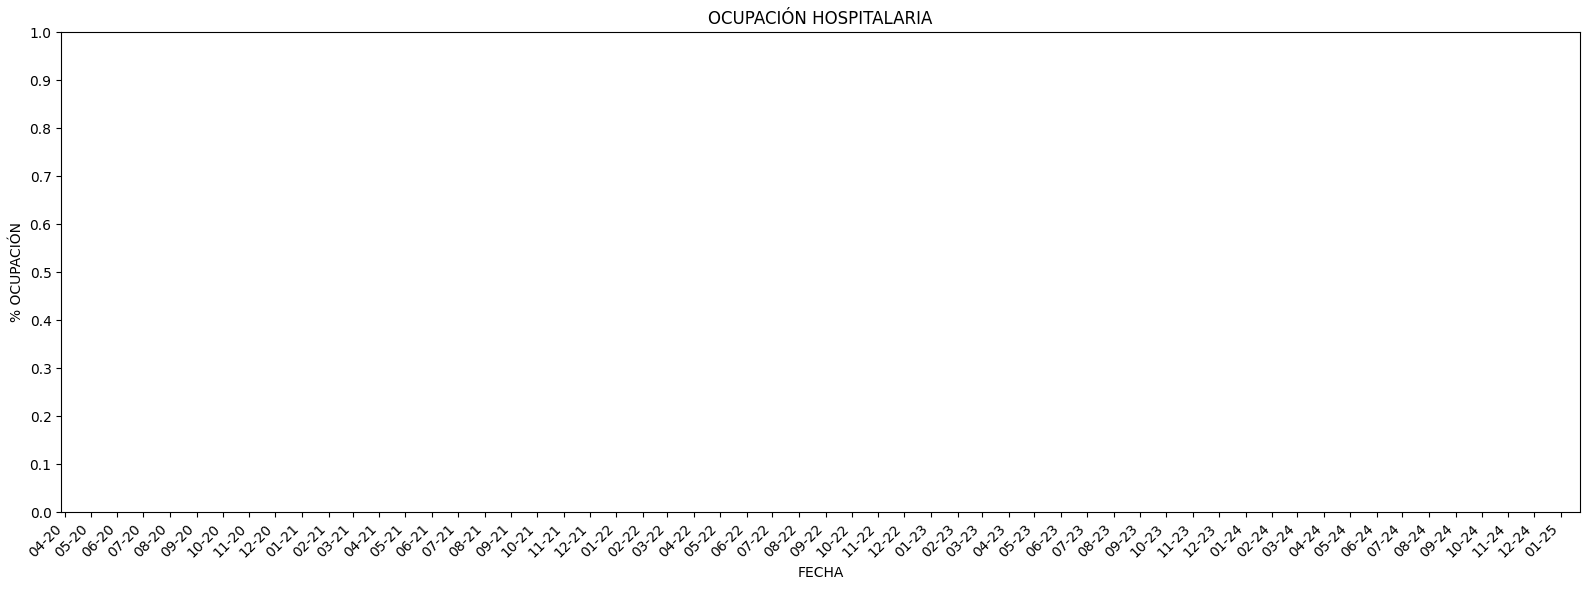

In [ ]:
# prompt: haz una grafica de dispersion para DF_13 en el eje x coloca Fecha corte y en el eje y coloca % OCUPACION, muestra el eje y entre 0 y 1, CADA 0.1. TITULO DE LA GRAFICA: OCUPACIÓN HOSPITALARIA, TITULO EJE Y: % OCUPACIÓN; TITULO EJE X: FECHA. EL EJE X DEJA CADA MES. EL FORMATO DE LAS FECHAS EN EL EJE X SEA MES-AÑO Y EL AÑO SOLO LOS DOS ULTIMOS NUMEROS

# Assuming DF_13 is already defined as in the previous code.

# Create the scatter plot
plt.figure(figsize=(16, 6))
plt.scatter(DF_13['Fecha corte'], DF_13['% OCUPACION'])

# Set plot title and axis labels
plt.title('OCUPACIÓN HOSPITALARIA')
plt.xlabel('FECHA')
plt.ylabel('% OCUPACIÓN')

# Set y-axis limits and ticks
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))

# Format x-axis dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
# prompt: A PARTIR DE DF_13 CREA DF_14 ordenando el dataframe en orden de menor a mayor por la columna Fecha corte

# Assuming DF_13 is already defined as in the previous code.

# Create a copy of DF_13 to avoid modifying the original DataFrame
DF_14 = DF_13.copy()

# Sort the DataFrame by the 'Fecha corte' column in ascending order
DF_14 = DF_14.sort_values(by='Fecha corte')

# Display the first few rows of the sorted DataFrame
print(DF_14.head())

     Fecha corte  DISPONIBLE     OCUPADA  CAMAS TOTALES  % OCUPACION  \
1301  2020-06-16   30.149082  214.850918        245.089    87.662408   
1302  2020-06-17   24.336029  220.663971        245.089    90.034221   
1303  2020-06-18   25.569530  219.430470        245.089    89.530934   
1304  2020-06-19   26.551591  218.448409        245.089    89.130238   
1305  2020-06-20   27.707107  217.292893        245.089    88.658770   

      CAMAS OCUPADAS PRED. BÁSICA  % OCUPACION PRED. BÁSICA  
1301                          NaN                       NaN  
1302                          NaN                       NaN  
1303                          NaN                       NaN  
1304                          NaN                       NaN  
1305                          NaN                       NaN  


In [ ]:
# prompt: BORRA TODAS LAS COLUMNAS DE DF_14 MENOS Fecha corte Y % OCUPACION Y GENERA UN NUEVO DATAFRAME LLAMADO DF_15

# Assuming DF_14 is already defined as in the previous code.

# Create a new DataFrame DF_15 with only the specified columns
DF_XTRAIN = DF_14[['Fecha corte', '% OCUPACION']]

# Display the first few rows of DF_15 to verify
print(DF_XTRAIN.head())

     Fecha corte  % OCUPACION
1301  2020-06-16    87.662408
1302  2020-06-17    90.034221
1303  2020-06-18    89.530934
1304  2020-06-19    89.130238
1305  2020-06-20    88.658770


In [ ]:
DF_XTRAIN.set_index('Fecha corte', inplace=True)

In [ ]:
DF_Train = DF_XTRAIN.loc["2020-06-16":"2023-06-16"]

DF_Validation = DF_XTRAIN.loc["2023-06-17":"2023-12-31"]

DF_Test = DF_XTRAIN.loc["2024-01-01":"2024-05-29"]

In [ ]:
print("DF_Train:", DF_Train.index.min(), "a", DF_Train.index.max())
print("DF_Validation:", DF_Validation.index.min(), "a", DF_Validation.index.max())
print("DF_Test:", DF_Test.index.min(), "a", DF_Test.index.max())

DF_Train: 2020-06-16 00:00:00 a 2023-06-16 00:00:00
DF_Validation: 2023-06-17 00:00:00 a 2023-12-31 00:00:00
DF_Test: 2024-01-01 00:00:00 a 2024-05-29 00:00:00


In [ ]:
print('Train', DF_Train.shape[0])
print('Validation', DF_Validation.shape[0])
print('Test', DF_Test.shape[0])

Train 1096
Validation 198
Test 150


In [ ]:
df_as_np = DF_Train.to_numpy()

fechas_train = DF_Train.index.to_numpy()
valores_train = DF_Train.values

fechas_validacion = DF_Validation.index.to_numpy()
valores_validacion = DF_Validation.values

fechas_test = DF_Test.index.to_numpy()
valores_test = DF_Test.values

In [ ]:
DF_Train.values

array([[87.66240753],
       [90.03422073],
       [89.53093383],
       ...,
       [97.14285714],
       [95.90163934],
       [84.93723849]])

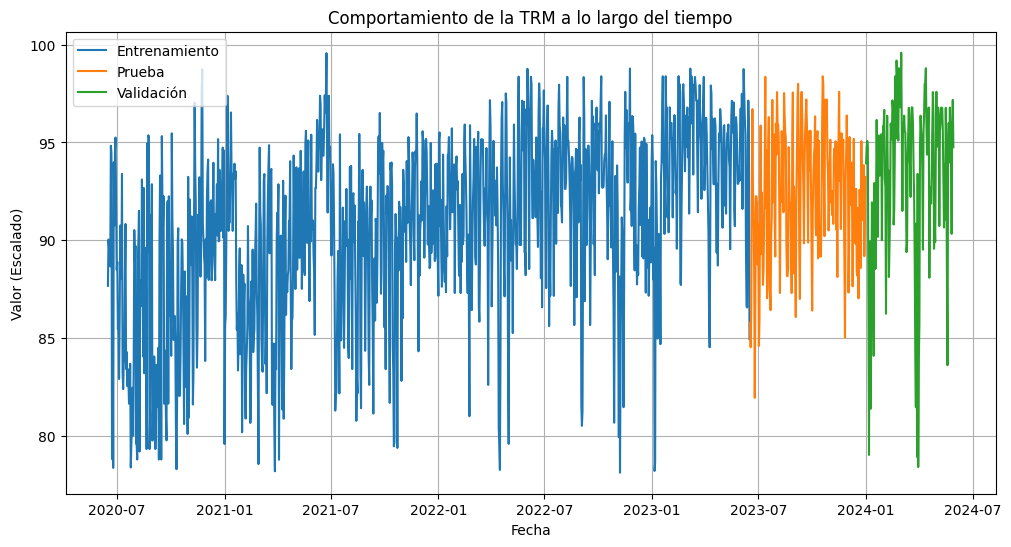

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(fechas_train,valores_train, label='Entrenamiento')
plt.plot(fechas_validacion,valores_validacion, label='Prueba')
plt.plot(fechas_test,valores_test, label='Validación')
plt.xlabel('Fecha')
plt.ylabel('Valor (Escalado)')
plt.title('Comportamiento de la TRM a lo largo del tiempo')
plt.grid()

plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:

def create_dataset(dataset, look_back=1):
      dataX, dataY = [], []
      for i in range(len(dataset)-look_back-1):
          a = dataset[i:(i+look_back), 0]
          dataX.append(a)
          dataY.append(dataset[i + look_back, 0])
      return np.array(dataX), np.array(dataY)

In [ ]:

look_back = 30  # Número de pasos de tiempo anteriores a considerar

# Preparar los conjuntos de entrenamiento, validación y prueba
X_train, y_train = create_dataset(valores_train, look_back)
X_validation, y_validation = create_dataset(valores_validacion, look_back)
X_test, y_test = create_dataset(valores_test, look_back)

In [ ]:
X_train[1]

array([90.03422073, 89.53093383, 89.13023784, 88.65877012, 94.83300965,
       94.46218059, 78.8       , 87.57519554, 78.34645669, 93.98662035,
       90.75104597, 94.51496187, 95.2526046 , 91.58416352, 88.49206349,
       88.88133278, 85.46255507, 85.9030837 , 82.89473684, 85.9030837 ,
       90.74889868, 90.74889868, 88.02169746, 93.39207048, 83.25991189,
       82.37885463, 83.70044053, 83.91304348, 88.26086957, 90.82969432])

In [ ]:
y_train[0]

90.82969432314411

In [ ]:
valores_train

array([[87.66240753],
       [90.03422073],
       [89.53093383],
       ...,
       [97.14285714],
       [95.90163934],
       [84.93723849]])

In [ ]:
# Darle forma a los datos de entrada para LSTM (muestras, pasos de tiempo, características)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_validation = np.reshape(X_validation, (X_validation.shape[0], X_validation.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
from tensorflow.keras.layers import LSTM, Dense,Dropout,Input

In [ ]:

# Crear el modelo LSTM
model1 = Sequential()
model1.add(LSTM(units=50,  input_shape=(look_back, 1)))
model1.add(Dropout(0.2))
model1.add(Dense(1))

# Compilar el modelo
model1.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse'])

# Entrenar el modelo
modellstm = model1.fit(X_train, y_train, epochs=50, batch_size=5, validation_data=(X_validation, y_validation), verbose=1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


213/213 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 7428.0005 - mse: 7428.0005 - val_loss: 6062.5532 - val_mse: 6062.5527
Epoch 2/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 5462.5815 - mse: 5462.5815 - val_loss: 4882.2402 - val_mse: 4882.2402
Epoch 3/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 4393.7437 - mse: 4393.7437 - val_loss: 3921.0261 - val_mse: 3921.0261
Epoch 4/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 3498.7632 - mse: 3498.7632 - val_loss: 3119.2610 - val_mse: 3119.2610
Epoch 5/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 2759.2292 - mse: 2759.2292 - val_loss: 2449.3755 - val_mse: 2449.3755
Epoch 6/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 2167.6521 - mse: 2167.6521 - val_loss: 1897.8385 - val_mse: 1897.8385
Epoch 7/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 1632.3911 - mse: 1632.3911 - val_loss: 1446.4197 - val_mse: 1446.4197
Epoch 8/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 1290.9927 - mse: 1290.9927 - val_

In [ ]:
# Evaluar el modelo
trainScore = model1.evaluate(X_train, y_train, verbose=0)
print('Resultado de entrenamiento: %.5f MSE' % (trainScore[0]))
validationScore = model1.evaluate(X_validation, y_validation, verbose=0)
print('Resultado de validación: %.5f MSE' % (validationScore[0]))
testScore = model1.evaluate(X_test, y_test, verbose=0)
print('Resultado de prueba: %.5f MSE' % (testScore[0]))

Resultado de entrenamiento: 18.21812 MSE
Resultado de validación: 16.20250 MSE
Resultado de prueba: 27.14343 MSE


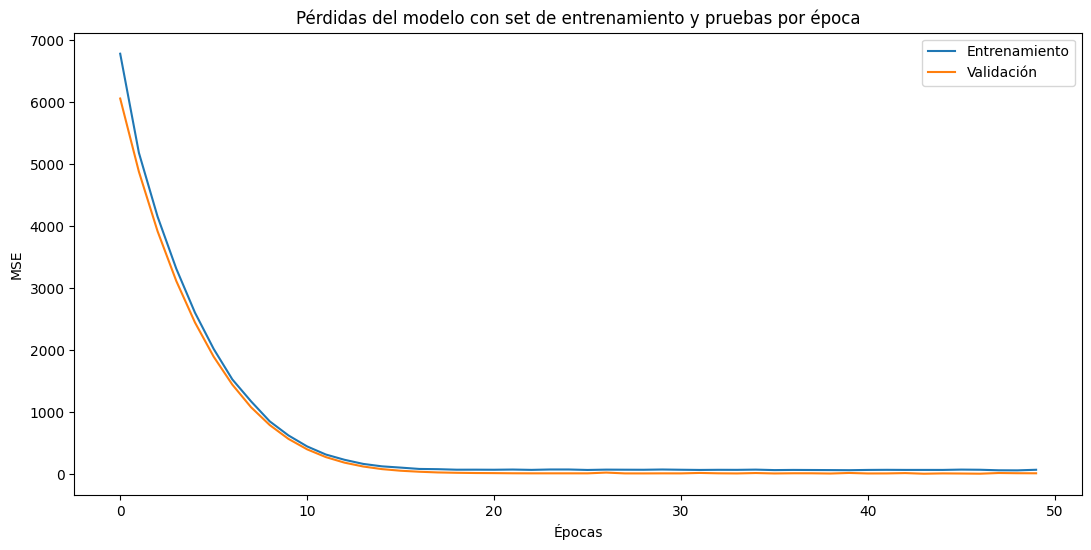

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(13,6))
plt.plot(modellstm.history['loss'])
plt.plot(modellstm.history['val_loss'])
plt.title("Pérdidas del modelo con set de entrenamiento y pruebas por época")
plt.ylabel('MSE')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.show()

In [ ]:
train_predictions = model1.predict(X_train)
val_predictions = model1.predict(X_validation)
test_predictions = model1.predict(X_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [ ]:
train_predictions = train_predictions.reshape(-1)
fechas_train = fechas_train[:len(train_predictions)]

val_predictions = val_predictions.reshape(-1)
fechas_validacion = fechas_validacion[:len(val_predictions)]

test_predictions = test_predictions.reshape(-1)
fechas_test = fechas_test[:len(test_predictions)]

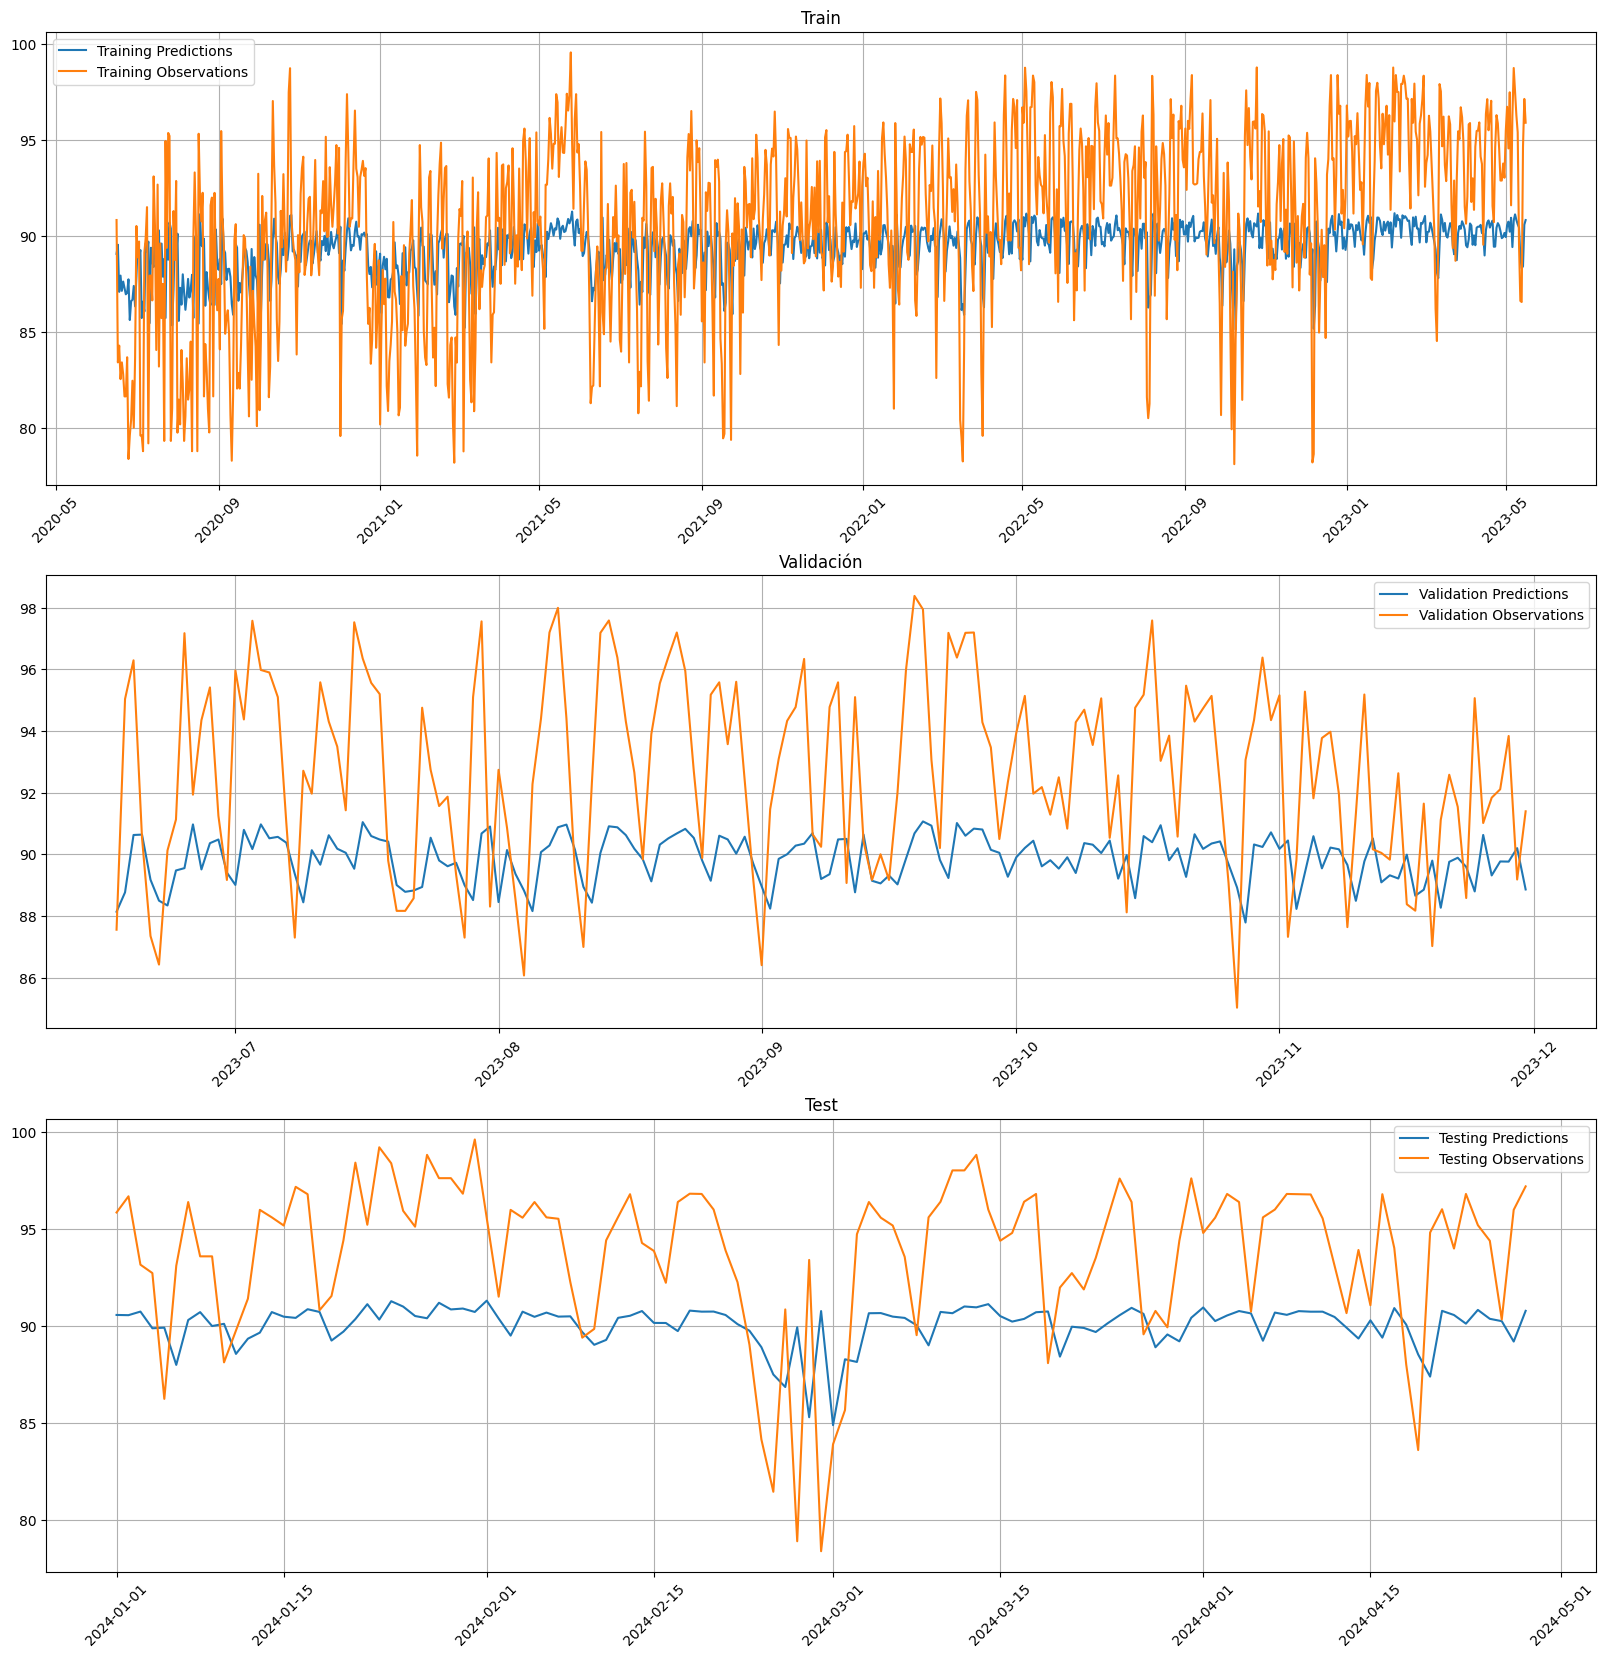

In [ ]:
# prompt: coloca las últimas 3graficas en un subplot de plt}

fig, axes = plt.subplots(3,1, figsize=(20, 20))

# Gráfico 1: Predicciones de entrenamiento vs. Observaciones de entrenamiento
axes[0].plot(fechas_train, train_predictions, label='Training Predictions')
axes[0].plot(fechas_train, y_train, label='Training Observations')
axes[0].set_title('Train')
axes[0].legend()
axes[0].grid(True)
axes[0].tick_params(axis='x', rotation=45)

# Gráfico 2: Predicciones de validación vs. Observaciones de validación
axes[1].plot(fechas_validacion, val_predictions, label='Validation Predictions')
axes[1].plot(fechas_validacion, y_validation, label='Validation Observations')
axes[1].set_title('Validación')
axes[1].legend()
axes[1].grid(True)
axes[1].tick_params(axis='x', rotation=45)


# Gráfico 3: Predicciones de prueba vs. Observaciones de prueba
axes[2].plot(fechas_test, test_predictions, label='Testing Predictions')
axes[2].plot(fechas_test, y_test, label='Testing Observations')
axes[2].set_title('Test')
axes[2].legend()
axes[2].grid(True)
axes[2].tick_params(axis='x', rotation=45)


#plt.tight_layout()
plt.show()

# **Busqueda de Hiperparametros con GridSearch**

In [ ]:
!pip install scikeras
from scikeras.wrappers import KerasRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout,Input
from sklearn.model_selection import GridSearchCV
import pandas as pd

# **MODELO CON PARÁMETROS AJUSTADOS**

In [ ]:
# prompt: GENERA UN GRIDSEARCH PARA ENCONTRAR LOS HIPERPARAMETROS QUE PERMITAN MINIMIZAR EL mse  DEL MODELO model1

from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor

# Define the model creation function for KerasRegressor
def create_model(units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units=units, input_shape=(look_back, 1)))
    model.add(Dropout(rate=dropout_rate))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
    return model

# Create the KerasRegressor wrapper
model = KerasRegressor(model=create_model, epochs=50, batch_size=5, verbose=1)

# Define the parameter grid for GridSearchCV
param_grid = {
    'model__units': [25, 50, 75],
    'model__dropout_rate': [0.1, 0.2, 0.3],
    'batch_size': [1, 2, 3, 4, 5, 10],
    'epochs': [20, 5, 70]
}

# Create GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)

# Fit the grid search to the data
grid_result = grid.fit(X_train, y_train, validation_data=(X_validation, y_validation))


# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
